01_dr.JPG


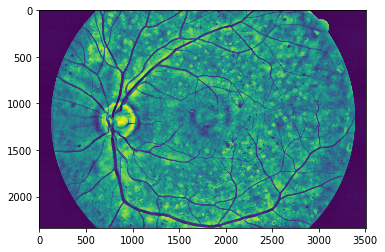

01_g.jpg


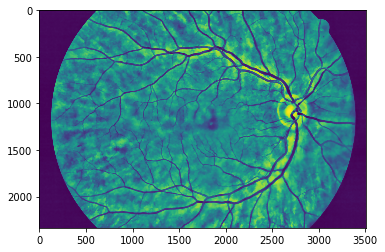

01_h.jpg


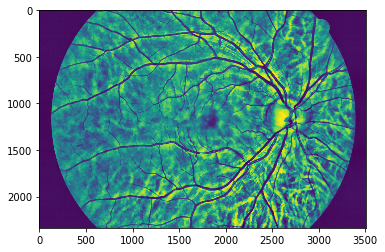

02_dr.JPG


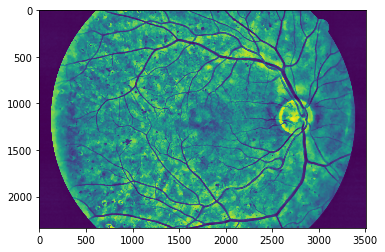

02_g.jpg


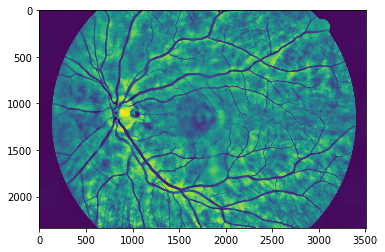

02_h.jpg


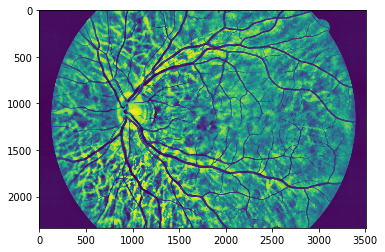

03_dr.JPG


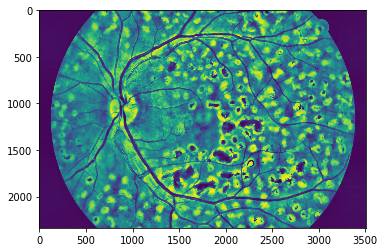

03_g.jpg


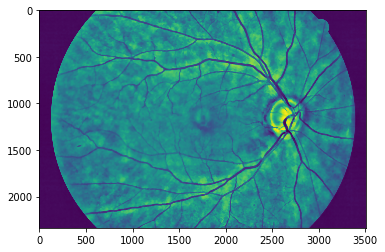

03_h.jpg


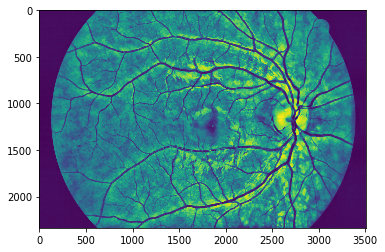

04_dr.JPG


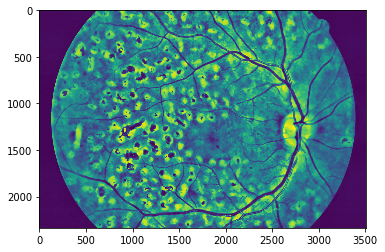

04_h.jpg


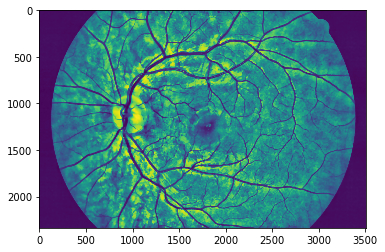

05_dr.JPG


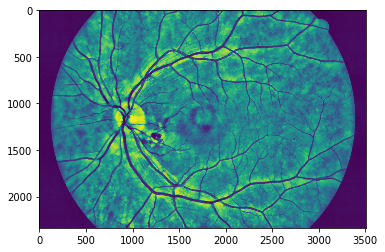

05_g.jpg


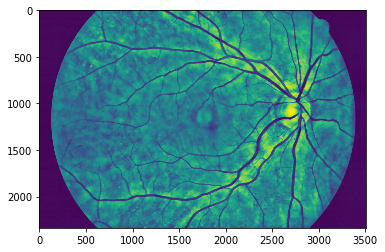

05_h.jpg


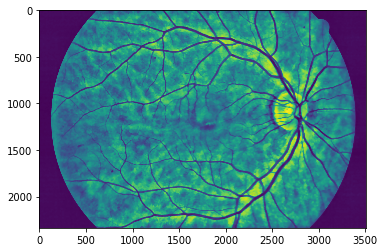

06_g.jpg


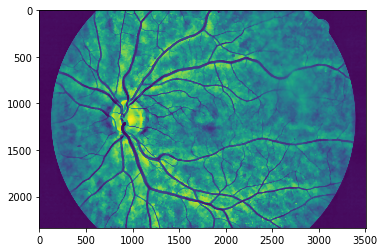

06_h.jpg


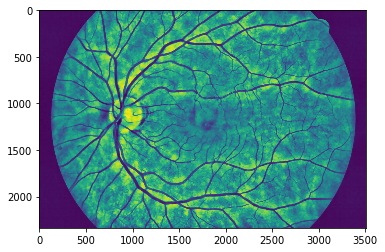

07_dr.JPG


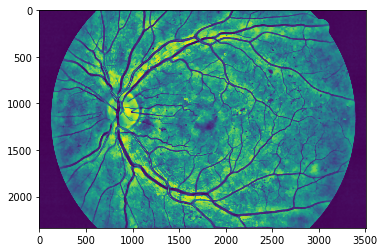

07_g.jpg


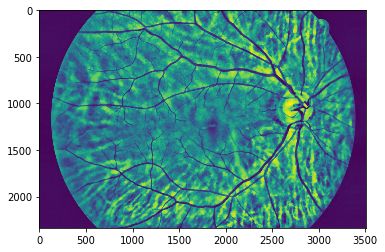

07_h.jpg


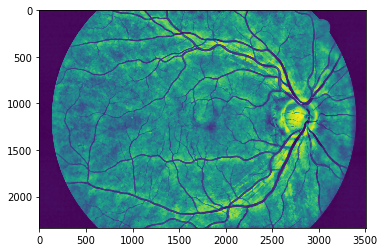

08_dr.JPG


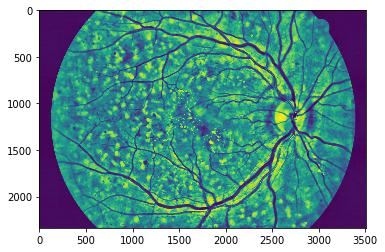

08_g.jpg


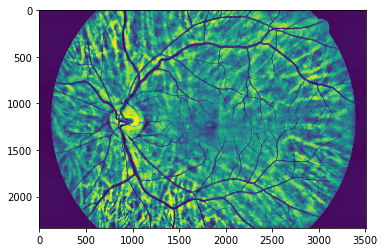

08_h.jpg


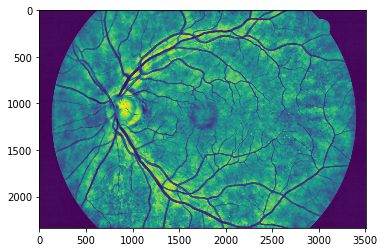

09_dr.JPG


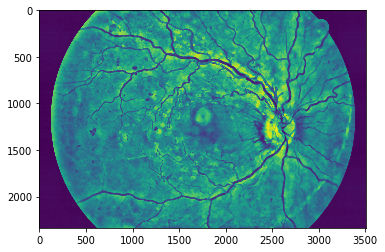

09_g.jpg


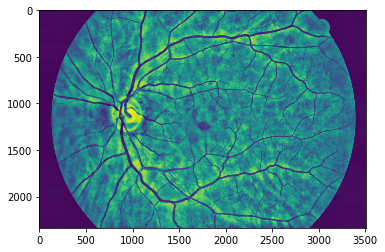

09_h.jpg


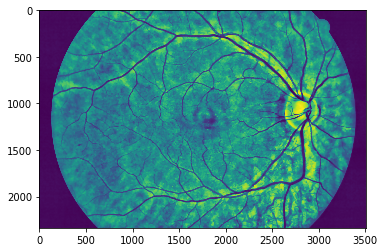

10_dr.JPG


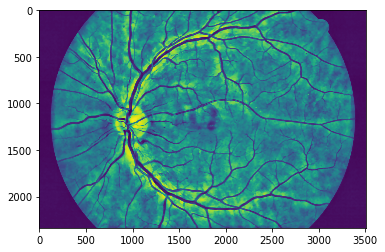

10_g.jpg


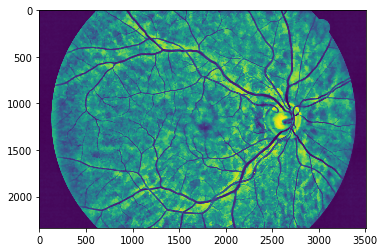

10_h.jpg


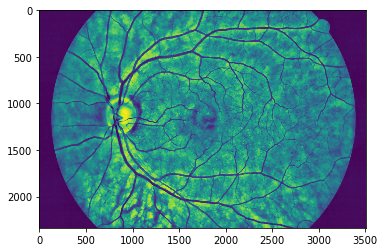

11_dr.JPG


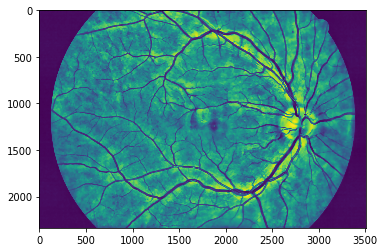

11_g.jpg


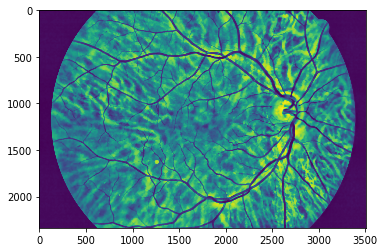

12_dr.JPG


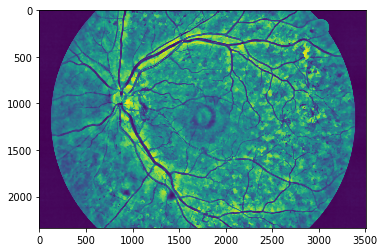

12_g.jpg


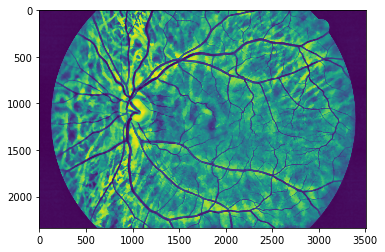

12_h.jpg


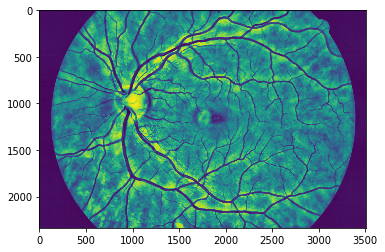

13_g.jpg


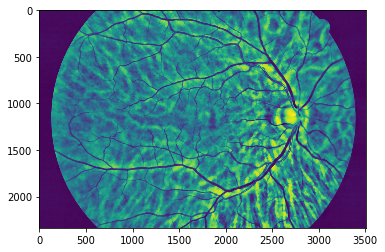

13_h.jpg


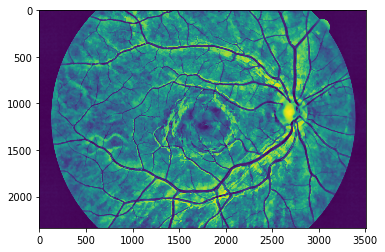

14_dr.JPG


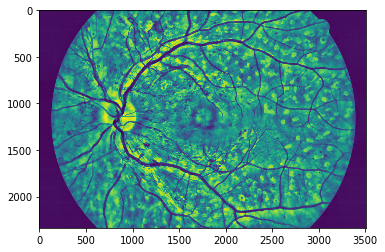

14_g.jpg


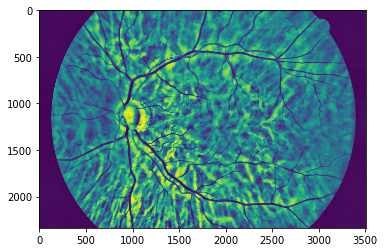

15_dr.JPG


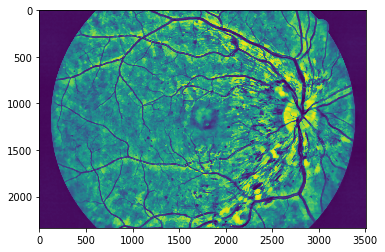

15_g.jpg


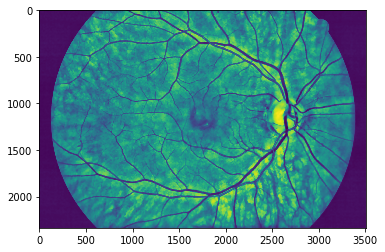

15_h.jpg


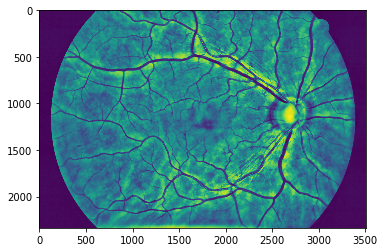

In [72]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import random

def find_in(name, sth):
    for v in sth:
        if v.startswith(name):
            return v
    return -1

def bgr2rgb(img):
    return img[...,::-1]

def load_color_img(path):
    return bgr2rgb(cv.imread(path))

def load_gray_img(path):
    return cv.imread(path, 0)

def pad_img(img, padsize):
    #rows
    if len(img.shape) == 3:
        upper_pad = img[img.shape[0]-padsize:img.shape[0], :, :]
        lower_pad = img[0:padsize+1, :, :]
    elif len(img.shape) == 2:
        upper_pad = img[img.shape[0]-padsize:img.shape[0], :]
        lower_pad = img[0:padsize+1, :]
    img = np.concatenate((upper_pad, img), axis=0)
    img = np.concatenate((img, lower_pad), axis=0)

    #columns
    if len(img.shape) == 3:
        p = np.zeros((img.shape[0], padsize, img.shape[2]), dtype=int)
    elif len(img.shape) == 2:
        p = np.zeros((img.shape[0], padsize), dtype=int)
    
    img = np.concatenate((p, img), axis=1)
    img = np.concatenate((img, p), axis=1)

    return img

def save_img(path, img):
    img = bgr2rgb(img)
    cv.imwrite(path, img)
    
def filter_image(img):
    clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(30,30))
    new = clahe.apply(img)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
    new = clahe.apply(new)
    new = cv.fastNlMeansDenoising(new, None, 30, 7, 21)
    return new

data_path = os.getcwd() + "/eye_data" + "/set1"
eyes_path = data_path + "/images" + "/"
vessels_path = data_path + "/vessels" + "/"
masks_path = data_path + "/mask" + "/"

yes_path = data_path + "/classes/yes_filter" + "/"
no_path = data_path + "/classes/no_filter" + "/"

eyes = sorted(os.listdir(eyes_path))
vessels = sorted(os.listdir(vessels_path))
masks = sorted(os.listdir(masks_path))

sample_size = 33
pad_size = int( np.floor(sample_size/2.0) )
samples_per_img = 5000
samples_counter = 0

for e in eyes:
    
    print(e)
    
    name = e[:e.lower().find(".jpg")]
    v = find_in(name, vessels)
    m = find_in(name, masks)
    
    eye_img = filter_image(load_gray_img(eyes_path+e))
    vessel_img = load_gray_img(vessels_path+v)
    mask_img = load_gray_img(masks_path+m)

    eye_padded = pad_img(eye_img, pad_size)
    vessel_padded = pad_img(vessel_img, pad_size)
    
    yeses, noes = 0, 0

    while yeses < samples_per_img/2 or noes < samples_per_img/2:
        
        x, y = random.randint(pad_size, eye_img.shape[0]-1), random.randint(pad_size, eye_img.shape[1]-1)
        
        if mask_img[x-pad_size][y-pad_size] > 0.0:
            sample = eye_padded[x-pad_size:x+pad_size+1, y-pad_size:y+pad_size+1]

            if vessel_padded[x][y] == 0 and noes < samples_per_img/2:
                noes += 1
                save_img(no_path + str(samples_counter) + ".png", sample)
            elif vessel_padded[x][y] != 0 and yeses < samples_per_img/2:
                yeses += 1
                save_img(yes_path + str(samples_counter) + ".png", sample)

            samples_counter += 1
    
    plt.imshow(eye_img)
    plt.show()



In [33]:
cv.__version__

'3.4.1'

True